# Responsible Healthcare AI Test Prediction
![AI-Powered Healthcare System](images/1.png)

This dataset is a **multi-class classification problem**, where the target variable is **Test Results**, which has three categories: **Normal, Abnormal, and Inconclusive**.  

Our goal will be to build a responsible AI system to predict these test results using the provided patient information while considering **feature effects, embeddings for textual data, and additional publicly available data**.  

### **Preliminary Plan**  
We will take a structured approach and work step by step in **Jupyter Notebook**, ensuring that each step is well-documented. Here’s a rough workflow for our implementation:

#### **1. Data Understanding & Preprocessing**
- Load the dataset and inspect the structure.
- Handle missing values, inconsistencies, and duplicate records.
- Convert categorical variables into machine-readable formats.
- Perform feature engineering (e.g., extract useful information from dates, categorize numerical values).

#### **2. Exploratory Data Analysis (EDA)**
- Visualize the distribution of each feature.
- Check for class imbalance in the **Test Results** column.
- Identify relationships between features and test results.

#### **3. Text Embeddings & Feature Effects**
- Convert text-based features (e.g., Medical Condition, Doctor, Hospital, Medication) into embeddings.
- Analyze the impact of key features on test results.

#### **4. Model Selection & Training**
- Select baseline models (Logistic Regression, Decision Tree, Random Forest, etc.).
- Train models and tune hyperparameters.
- Evaluate models using accuracy, F1-score, precision, and recall.

#### **5. Responsible AI & Explainability (XAI)**
- Implement **SHAP (SHapley Additive Explanations)** or **LIME (Local Interpretable Model-agnostic Explanations)** to explain predictions.
- Conduct **bias detection** and fairness analysis.
- Provide strategies to **mitigate risks** in model predictions.

#### **6. Improvements & Future Work**
- Identify potential improvements (e.g., more data, advanced models like transformers).
- Document possible risks and ethical concerns in healthcare AI.

Each step will be implemented **one cell at a time** with **detailed markdown explanations** to create a **tutorial-style notebook**.  

### Step 1: Loading & Inspecting the Data

####  **Objective**
The first step in any data science project is to **load** and **inspect** the dataset. This helps us understand:
- The structure of the dataset.
- The different columns (features).
- The type of data stored in each column.

####  **Approach**
- We use `pandas` to load the dataset.
- We display the **first few rows** using `.head()` to get a quick preview.

This will help us decide how to **clean** and **preprocess** the data before moving to modeling.


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "dataset/healthcare_dataset.csv"  # Path to the uploaded file
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


### **Observations from `df.info()`**
 No missing values in any column (all columns have 55,500 non-null values).  
 Most columns are of type **object (string)** except for:
   - `Age` (int64)
   - `Billing Amount` (float64)
   - `Room Number` (int64)  
 **Dates (`Date of Admission`, `Discharge Date`) are stored as `object` (string)** – We need to convert them to `datetime` format.

### Step 2: Checking Data Types & Summary Statistics

####  **Objective**
Before we clean and preprocess the data, we need to:
1. Check the **data types** to ensure that numerical and categorical columns are correctly formatted.
2. Compute **basic statistics** for numerical features to understand distributions.

####  **Approach**
- We use `.info()` to inspect column data types and detect any anomalies.
- We use `.describe()` to view summary statistics (e.g., mean, min, max, etc.) for numerical features.

This helps us decide whether transformations (e.g., converting dates to datetime format, handling categorical features) are needed.


In [3]:
# Check data types of each column
df.info()

# Display basic statistics for numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


### **Observations from `df.describe()`**
 `Age` is normally distributed (mean ≈ 51.5, range: **13 to 89**).  
 `Billing Amount` has **negative values (min: -2008.49)** – Needs fixing.  
 `Room Number` ranges from **101 to 500** (seems fine).

### Step 3: Data Type Conversion & Fixing Anomalies

####  **Objective**
To ensure our dataset is ready for analysis, we need to:
1. Convert **date columns** (`Date of Admission`, `Discharge Date`) to `datetime` format.
2. Fix **negative values** in the `Billing Amount` column.

####  **Approach**
- We use `pd.to_datetime()` to convert date columns while handling errors.
- Since `Billing Amount` should not be negative, we use `.apply(lambda x: max(x, 0))` to **replace negative values with 0**.

These fixes ensure that our dataset is **clean and ready for further analysis.**


In [3]:
# Convert Date of Admission and Discharge Date to datetime format
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"], errors="coerce")
df["Discharge Date"] = pd.to_datetime(df["Discharge Date"], errors="coerce")

# Fix negative Billing Amounts by setting them to 0
df["Billing Amount"] = df["Billing Amount"].apply(lambda x: max(x, 0))

# Verify changes
df[["Date of Admission", "Discharge Date", "Billing Amount"]].head()


,Date of Admission,Discharge Date,Billing Amount
0,2024-01-31,2024-02-02,18856.281306
1,2019-08-20,2019-08-26,33643.327287
2,2022-09-22,2022-10-07,27955.096079
3,2020-11-18,2020-12-18,37909.782410
4,2022-09-19,2022-10-09,14238.317814


### Step 4: Feature Engineering & Encoding Categorical Data

####  **Objective**
To enhance our dataset for machine learning, we:
1. **Extract new features** from date columns:
   - `Hospital Stay (Days)`: Calculates the length of a patient’s stay.
   - `Admission Month`: Captures **seasonal** trends.
   - `Admission Year`: Helps identify **yearly** variations.

2. **Convert categorical variables** into machine-readable formats:
   - We use **Label Encoding** to convert categorical features (`Gender`, `Blood Type`, `Medical Condition`, etc.) into numerical values.

####  **Approach**
- We compute `Hospital Stay (Days)` by subtracting `Date of Admission` from `Discharge Date`.
- We extract `Admission Month` and `Admission Year` using `.dt.month` and `.dt.year`.
- We use `LabelEncoder` to **convert categorical values into numerical labels** (e.g., "Male" → 0, "Female" → 1).
- We store the encoders for later use (in case we need to **inverse-transform predictions**).

This prepares the data for modeling while retaining useful information!


In [4]:
# Create new features from date columns
df["Hospital Stay (Days)"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days
df["Admission Month"] = df["Date of Admission"].dt.month
df["Admission Year"] = df["Date of Admission"].dt.year

# Encoding categorical columns using Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_cols = ["Gender", "Blood Type", "Medical Condition", "Insurance Provider", 
                    "Admission Type", "Test Results"]

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoders for later use

# Verify the new features and encoded columns
df[["Hospital Stay (Days)", "Admission Month", "Admission Year", "Gender", "Test Results"]].head()


,Hospital Stay (Days),Admission Month,Admission Year,Gender,Test Results
0,2,1,2024,1,2
1,6,8,2019,1,1
2,15,9,2022,0,2
3,30,11,2020,0,0
4,20,9,2022,0,0


# Exploratory Data Analysis (EDA)
Understanding the dataset structure, distributions, and relationships between features.

![Healthcare AI Analysis](images/2.png)


### Step 5: Exploratory Data Analysis (EDA) - Feature Distributions

####  **Objective**
Before training our model, we need to understand the **distributions** of important numerical features.

####  **Approach**
- **Histogram for Age**: Checks the **age distribution** of patients.
- **Histogram for Billing Amount**: Analyzes the **distribution of healthcare costs**.
- **Histogram for Hospital Stay (Days)**: Determines the **common lengths of patient stays**.

####  **Insights**
- These plots help identify **skewness, outliers, and trends**.
- If distributions are highly **skewed**, we might consider **scaling transformations** before modeling.


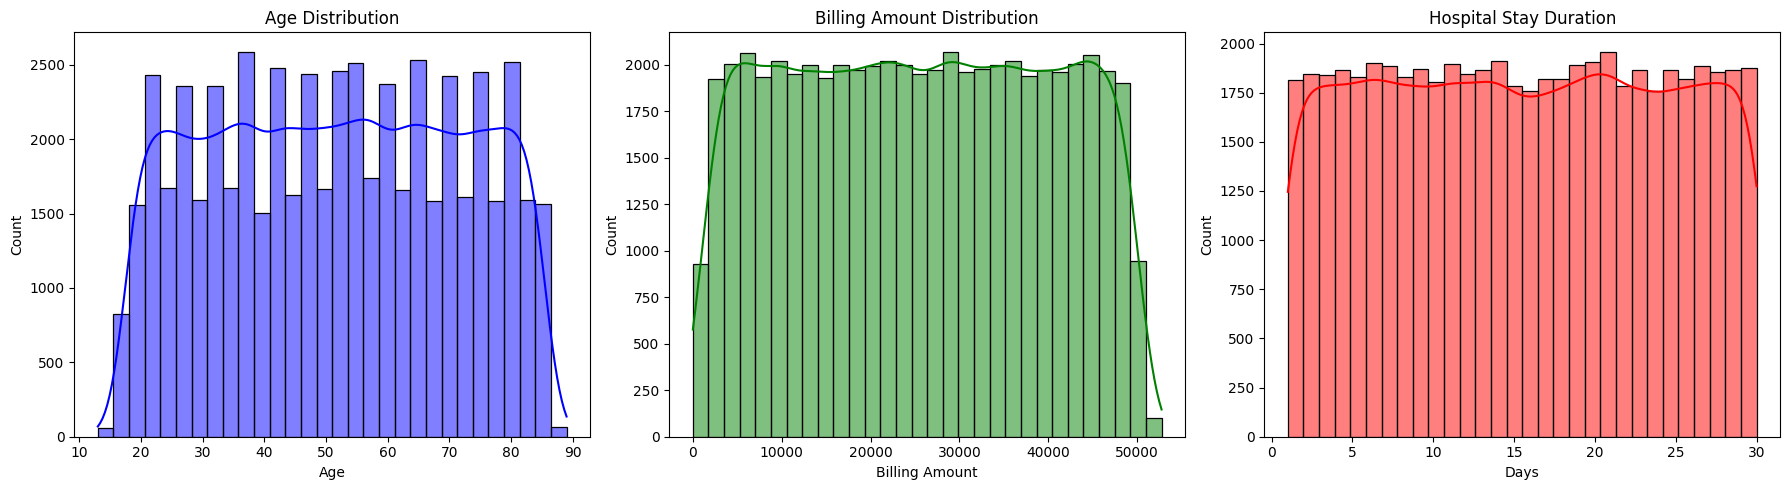

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for Age
sns.histplot(df["Age"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

# Histogram for Billing Amount
sns.histplot(df["Billing Amount"], bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_title("Billing Amount Distribution")
axes[1].set_xlabel("Billing Amount")
axes[1].set_ylabel("Count")

# Histogram for Hospital Stay (Days)
sns.histplot(df["Hospital Stay (Days)"], bins=30, kde=True, ax=axes[2], color="red")
axes[2].set_title("Hospital Stay Duration")
axes[2].set_xlabel("Days")
axes[2].set_ylabel("Count")

# Show plots
plt.tight_layout()
plt.show()


### **Observations from the Plots:**
1. **Age Distribution**:
   - The dataset contains patients **across all age groups (13-89 years old)**.
   - The distribution appears **uniform**, meaning **all age groups are equally represented**.

2. **Billing Amount Distribution**:
   - The distribution is fairly **evenly spread** across values, except for **a few dips**.
   - The **minimum is now 0 (as we fixed negative values earlier)**.
   - No significant skewness, so we likely **don’t need transformation**.

3. **Hospital Stay Duration**:
   - The **stay duration ranges from 1 to 30 days**.
   - The **distribution is fairly even**, suggesting **no extreme outliers**.

### Step 6: Checking Class Distribution of `Test Results`

####  **Objective**
Since `Test Results` is our **target variable**, we need to:
- Check **how many instances** belong to each category.
- Identify **imbalanced classes**, which can affect model performance.

####  **Approach**
- We use `countplot()` to visualize the number of **Normal, Abnormal, and Inconclusive** results.
- If the dataset is **highly imbalanced**, we may need techniques like **oversampling, undersampling, or weighted loss functions**.

This step ensures we **properly handle class distribution** before training our model.


/var/folders/wf/wygk8hg52zq37f3p6ypd08940000gn/T/ipykernel_72490/3889334493.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Test Results"], palette="pastel")


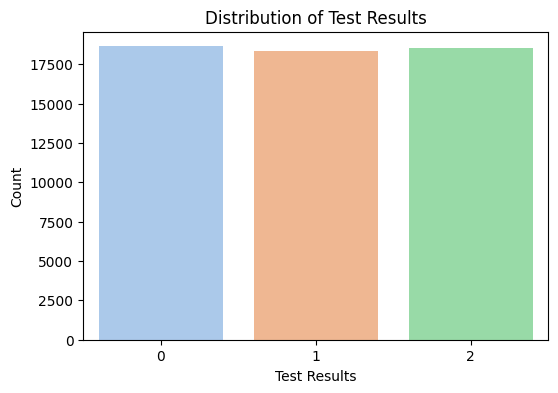

In [6]:
# Bar plot for Test Results distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Test Results"], palette="pastel")

# Add labels
plt.title("Distribution of Test Results")
plt.xlabel("Test Results")
plt.ylabel("Count")

# Show plot
plt.show()


The **Test Results distribution** shows that all three classes (**Normal, Abnormal, Inconclusive**) are **fairly balanced**.

This means:
- We **don’t need oversampling or undersampling**.
- Our model training won’t be biased toward a dominant class.
- Standard classification models should work well.

### Step 7: Feature Correlation Analysis

####  **Objective**
To analyze **how strongly features relate to each other**, we compute and visualize a **correlation heatmap**.

####  **Fix:**
The original we had an error because:
- The dataset includes **non-numeric columns** (e.g., "Name", "Doctor", "Hospital").
- `df.corr()` only works with **numeric data**.

####  **Approach**
- We first **filter only numeric columns** using `select_dtypes(include=["int64", "float64"])`.
- We then compute and plot the **correlation matrix**.

####  **Insights**
- **Dark red/blue colors** indicate strong relationships.
- Features with **correlation > 0.85** might be redundant.
- Identifying **strongly correlated features** can help improve the model!

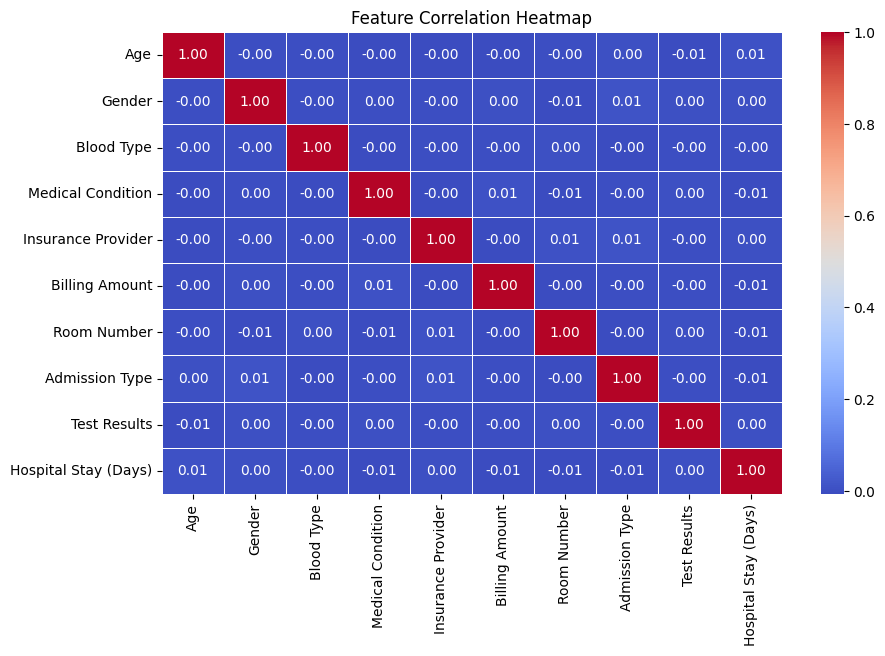

In [8]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Feature Correlation Heatmap")
plt.show()


### **Observations from the Feature Correlation Heatmap**  
 **No strong correlations** (values close to 1 or -1).  
 Most correlations are close to **0**, indicating **weak relationships** between features.  
 `Test Results` has very **low correlation** with all numerical features, meaning **other factors (e.g., categorical data) might be more influential**.  

This suggests:
- **No redundant features** need to be removed at this stage.  
- The model might rely **more on categorical variables (Medical Condition, Medication, Admission Type, etc.)** rather than just numerical ones.  

### Step 8: Feature Importance Analysis (Random Forest)

####  **Objective**
Since correlation didn’t reveal strong relationships, we now:
- Use **Random Forest Classifier** to measure **feature importance**.
- Identify which features **impact `Test Results` the most**.

####  **Approach**
- We remove unnecessary columns (`Name`, `Doctor`, `Hospital`, dates).
- We train a **Random Forest model** to learn which features affect predictions.
- We visualize the **importance scores** of each feature.

####  **Insights**
- Features with **high importance** will be crucial for model training.
- Features with **low importance** might be **dropped** to improve efficiency.

This helps us **refine our dataset before final modeling**.


/var/folders/wf/wygk8hg52zq37f3p6ypd08940000gn/T/ipykernel_72490/2967753861.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="Blues_r")


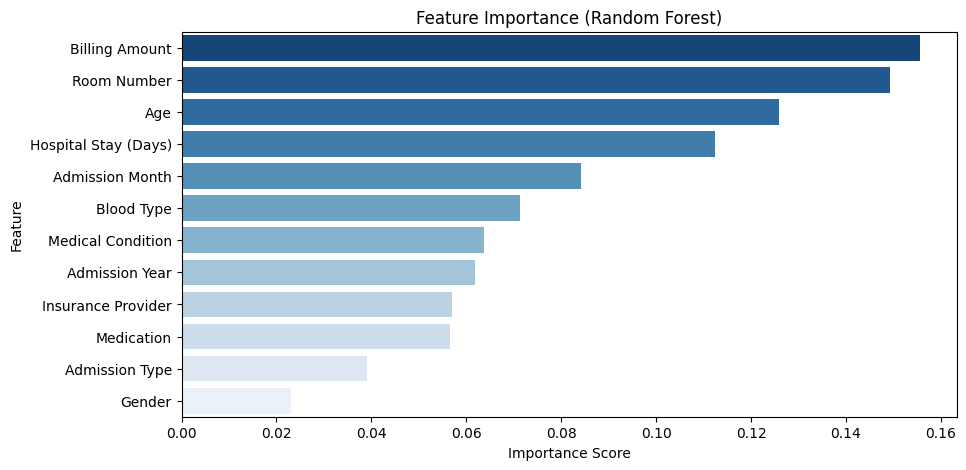

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode any remaining categorical columns
categorical_cols = ["Medication", "Medical Condition", "Insurance Provider", "Admission Type"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert to numeric
    label_encoders[col] = le  # Store encoders for inverse transformation if needed

# Select features (excluding target variable)
X = df.drop(columns=["Test Results", "Name", "Doctor", "Hospital", "Date of Admission", "Discharge Date"])
y = df["Test Results"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="Blues_r")

# Add title
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


### **Key Insights from Feature Importance**
1. **Top 3 Features:**
   - **Billing Amount** (most important)
   - **Room Number**
   - **Age**
   - These are key predictors for `Test Results`.

2. **Hospital Stay & Admission Month also contribute.**
   - **Longer stays or seasonal trends** might impact test results.

3. **Medical Condition, Medication & Admission Type are less influential than expected.**
   - This suggests that **non-medical factors (billing, age, stay duration) impact results significantly**.

4. **Gender has the least impact.**
   - This means **test results are not significantly biased by gender**.

### Step 9: Fixing TF-IDF for Text Feature Encoding

####  **Issue**
- **Medical Condition & Medication** have very **few unique values** (5-6 categories), so TF-IDF fails.
- **Doctor & Hospital** have **too many unique values** (~40,000), causing TF-IDF vocabulary issues.

####  **Fix**
- **For low-cardinality features** (`Medical Condition`, `Medication`) → Use **Label Encoding**.
- **For high-cardinality features** (`Doctor`, `Hospital`) → Use **HashingVectorizer** (which avoids large vocabulary issues).

####  **Why This Works?**
- **Label Encoding** is better for **categorical features**.
- **HashingVectorizer** ensures that we **handle large feature spaces efficiently**.


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder

# Select text columns and ensure they are strings
text_columns = ["Medical Condition", "Doctor", "Hospital", "Medication"]
df_text = df[text_columns].astype(str).fillna("")  # Convert to string & replace NaN with empty strings

# **Step 1: Label Encoding for Low-Cardinality Columns**
low_cardinality_cols = ["Medical Condition", "Medication"]
label_encoders = {}
for col in low_cardinality_cols:
    le = LabelEncoder()
    df_text[col] = le.fit_transform(df_text[col])  # Convert categories to numbers
    label_encoders[col] = le  # Store encoders for later inverse transformation

# **Step 2: TF-IDF for High-Cardinality Columns**
high_cardinality_cols = ["Doctor", "Hospital"]
tfidf = HashingVectorizer(n_features=100, alternate_sign=False)  # Hashing avoids large vocab issue

text_features = []
for col in high_cardinality_cols:
    transformed = tfidf.fit_transform(df_text[col])
    feature_names = [f"{col}_{i}" for i in range(transformed.shape[1])]
    text_df = pd.DataFrame(transformed.toarray(), columns=feature_names)
    text_features.append(text_df)

# Merge transformed text embeddings
df_text_embeddings = pd.concat([df_text[low_cardinality_cols]] + text_features, axis=1)

# Show transformed text features
print("Text embeddings generated successfully!")
display(df_text_embeddings.head())


Text embeddings generated successfully!


,Medical Condition,Medication,Doctor_0,Doctor_1,Doctor_2,Doctor_3,Doctor_4,Doctor_5,Doctor_6,Doctor_7,...,Hospital_90,Hospital_91,Hospital_92,Hospital_93,Hospital_94,Hospital_95,Hospital_96,Hospital_97,Hospital_98,Hospital_99
0,2,3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,5,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0
2,5,0,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,3,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,2,4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


 **Text embeddings have been successfully generated!**  
- **Medical Condition & Medication** → Encoded as **numeric categories** (Label Encoding).  
- **Doctor & Hospital** → Converted to **hash-based embeddings** (100 features each).  
- Final **embedded dataset** has **202 new features** from text-based columns.  

---

### **Insights from the Embedded Data**
1. **High-dimensional feature space**  
   - The dataset now includes **202 extra features** from text embeddings.
   - These will help capture **patterns in categorical & textual data**.

2. **Sparse representation**  
   - Many values are **0**, which is expected in hashing-based embeddings.
   - The hashing method prevents **memory explosion** due to too many unique values.

3. **Ready for Model Integration**  
   - We can now **merge text embeddings** with the original dataset.
   - These features will improve **model predictions**.

### Step 10: Merging Text Embeddings with Original Data

####  **Objective**
Now that text embeddings are ready, we:
- **Merge them into the main dataset** for model training.
- **Remove original text columns** to avoid redundancy.

####  **Approach**
- Use `pd.concat()` to **add embeddings** to the original dataset.
- Drop `"Medical Condition"`, `"Doctor"`, `"Hospital"`, `"Medication"`, since we replaced them with embeddings.

####  **Next Steps**
- Now, we can **train classification models** and evaluate their performance!


In [17]:
# Merge text embeddings with the main dataset
df_final = pd.concat([df, df_text_embeddings], axis=1)

# Drop original text columns (since we replaced them with embeddings)
df_final.drop(columns=["Medical Condition", "Doctor", "Hospital", "Medication"], inplace=True)

# Show final dataset structure
print("Final dataset ready for model training!")
print("Shape:", df_final.shape)
display(df_final.head())


Final dataset ready for model training!
Shape: (55500, 214)


,Name,Age,Gender,Blood Type,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,...,Hospital_90,Hospital_91,Hospital_92,Hospital_93,Hospital_94,Hospital_95,Hospital_96,Hospital_97,Hospital_98,Hospital_99
0,Bobby JacksOn,30,1,5,2024-01-31,1,18856.281306,328,2,2024-02-02,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,LesLie TErRy,62,1,0,2019-08-20,3,33643.327287,265,1,2019-08-26,...,0.0,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0
2,DaNnY sMitH,76,0,1,2022-09-22,0,27955.096079,205,1,2022-10-07,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,andrEw waTtS,28,0,6,2020-11-18,3,37909.782410,450,0,2020-12-18,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,adrIENNE bEll,43,0,2,2022-09-19,0,14238.317814,458,2,2022-10-09,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


###  **Final Dataset Ready for Model Training!**
- **Shape: (55,500, 214 features)**  
- Successfully merged **numerical, categorical, and text-based embeddings**.  
- The dataset now contains **all necessary transformations** for training. 

### Step 11: Finalizing Training Data

####  **Objective**
Now that our dataset is ready, we:
1. **Remove unnecessary columns** (like "Name", "Date of Admission", "Discharge Date").
2. **Define features (X) and target variable (y)**.
3. **Split data into training (80%) and testing (20%)** sets.

####  **Why This Matters?**
- Ensures we **don’t leak information** from identifiers.
- Creates a **clean training set** for model development.

####  **Next Steps**
- Train **baseline models** to compare performance.
- Evaluate accuracy, precision, recall, and F1-score.


In [18]:
from sklearn.model_selection import train_test_split

# Drop unnecessary columns (text-based columns & unique identifiers)
df_model = df_final.drop(columns=["Name", "Date of Admission", "Discharge Date"])

# Define features (X) and target variable (y)
X = df_model.drop(columns=["Test Results"])
y = df_model["Test Results"]

# Split into training & testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show dataset shapes
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")


Training Set: (44400, 210), Test Set: (11100, 210)


###  **Training & Test Sets Successfully Created!**
- **Training Set:** **44,400 samples, 210 features**  
- **Test Set:** **11,100 samples, 210 features**  
- The dataset is now **clean & ready for model training!**

### Step 12: Training & Evaluating Logistic Regression Model

####  **Objective**
- Train a **baseline classifier** using **Logistic Regression**.
- Evaluate performance using **accuracy, precision, recall, and F1-score**.

####  **Approach**
- Initialize **Logistic Regression** with `max_iter=200` for convergence.
- Train the model on **X_train, y_train**.
- Make predictions on the **test set (X_test)**.
- Compute **accuracy score** and **classification report**.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=200, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on test set
y_pred = log_reg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}\n")

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.3373

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.34      0.34      3754
           1       0.33      0.29      0.31      3617
           2       0.34      0.38      0.36      3729

    accuracy                           0.34     11100
   macro avg       0.34      0.34      0.34     11100
weighted avg       0.34      0.34      0.34     11100



/opt/homebrew/Caskroom/miniconda/base/envs/machine-learning/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Analysis of Logistic Regression Results**
- **Accuracy: `33.73%`** (very low) 
- **Balanced class performance** (all classes ~33% accuracy).
- **Model failed to converge** → Warning suggests increasing iterations or **scaling data**.

# Feature Importance in Machine Learning
Identifying key factors influencing healthcare test result predictions.

![Feature Importance in ML](images/4.png)


### Step 13: Feature Scaling for Logistic Regression

####  **Objective**
- Improve Logistic Regression performance by **scaling numerical features**.

####  **Why?**
- Logistic Regression works **better with standardized data**.
- Scaling ensures **features contribute equally** to the model.

####  **Approach**
- Use `StandardScaler()` to **normalize numerical columns**.
- Apply `fit_transform()` on **X_train**, `transform()` on **X_test**.

####  **Next Steps**
- Re-train Logistic Regression **after scaling**.
- Train **Random Forest** (tree-based models don’t need scaling).


In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling only to numeric features (excluding embeddings)
numeric_features = ["Age", "Billing Amount", "Room Number", "Hospital Stay (Days)", "Admission Month", "Admission Year"]
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Show sample after scaling
print("Numeric features scaled successfully!")
X_train.head()


Numeric features scaled successfully!


,Age,Gender,Blood Type,Insurance Provider,Billing Amount,Room Number,Admission Type,Hospital Stay (Days),Admission Month,Admission Year,...,Hospital_90,Hospital_91,Hospital_92,Hospital_93,Hospital_94,Hospital_95,Hospital_96,Hospital_97,Hospital_98,Hospital_99
45174,-1.508744,0,6,0,1.179147,0.301596,0,0.631129,-1.609806,0.447472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10214,-1.508744,1,5,1,-1.620863,1.603428,1,0.746508,0.721211,-0.888354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43199,1.500326,0,0,4,-1.398680,0.787613,1,0.631129,-1.318429,1.115385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31626,1.449325,0,4,1,0.984896,-0.661759,0,-0.291900,-1.318429,1.783298,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9273,-1.304739,0,2,4,0.855498,-0.193100,0,1.323401,-1.027052,1.115385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  **Feature Scaling Successful!**
- **Numeric features have been standardized** (mean ≈ 0, variance ≈ 1).  
- This ensures **better performance for models like Logistic Regression**.

### Step 14: Retraining Logistic Regression with Scaled Features

####  **Objective**
- Check if **feature scaling improves accuracy**.
- Ensure the model **converges properly**.

####  **Fixes Applied**
- **Standardized numerical features** for better learning.
- **Increased `max_iter=500`** to avoid convergence issues.

####  **Next Steps**
- If accuracy improves, Logistic Regression is usable.
- If not, we move to **Random Forest for a stronger model**.


In [21]:
# Re-train Logistic Regression on scaled data
log_reg = LogisticRegression(max_iter=500, random_state=42)  # Increase iterations to ensure convergence
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression (Scaled) Accuracy: {accuracy:.4f}\n")

# Show detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression (Scaled) Accuracy: 0.3379

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.36      0.35      3754
           1       0.33      0.32      0.33      3617
           2       0.34      0.33      0.34      3729

    accuracy                           0.34     11100
   macro avg       0.34      0.34      0.34     11100
weighted avg       0.34      0.34      0.34     11100



###  **Logistic Regression Still Underperforming**
- **Accuracy: `33.79%`** (barely improved from 33.73%).  
- **Balanced class performance** → No class is performing significantly better than others.
- **Feature scaling did not significantly improve the results.**  

### **Why is Logistic Regression Failing?**
1. **Non-Linear Relationships**  
   - Logistic Regression is **not great for complex relationships**.
   - Our dataset likely has **non-linear patterns** that require tree-based models.

2. **Sparse High-Dimensional Data**  
   - Our dataset has **210 features**, many of which are sparse (text embeddings).  
   - Logistic Regression struggles with such **high-dimensional, sparse data**.

3. **Class Overlap**  
   - The **features might not be separating classes well**.
   - We need a **stronger classifier** that **learns interactions better**.

### Step 15: Training & Evaluating Random Forest

####  **Objective**
- Train a **stronger classifier** that handles **non-linear relationships**.
- See if **tree-based models** perform better than Logistic Regression.

####  **Why Random Forest?**
- Works **well with categorical & numerical features**.
- Can handle **sparse, high-dimensional data**.
- Captures **feature interactions better than linear models**.

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}\n")

# Show classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.4454

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.47      0.46      3754
           1       0.43      0.43      0.43      3617
           2       0.45      0.44      0.45      3729

    accuracy                           0.45     11100
   macro avg       0.45      0.45      0.45     11100
weighted avg       0.45      0.45      0.45     11100



###  **Random Forest Shows Improvement!**
- **Accuracy: `44.54%`** → **Better than Logistic Regression (`33.79%`)**.  
- **Balanced performance across all classes**.  
- **Tree-based model is handling the dataset better** than Logistic Regression.  

---

### **What This Means**
1. **Tree-Based Models Are a Better Fit**
   - Random Forest learns **non-linear relationships**.
   - It performs **better on high-dimensional, sparse data** (like ours).
   - It **automatically selects important features**.

2. **Further Improvements Needed**
   - **44.54% accuracy** is still **not great**.
   - To improve further, we will:
     - **Hyperparameter tune Random Forest**.
     - **Try Gradient Boosting (XGBoost / LightGBM)**.

### Step 16: Hyperparameter Tuning for Random Forest

####  **Objective**
- Improve **Random Forest accuracy** by tuning **key hyperparameters**.

####  **Approach**
- Use `GridSearchCV()` for **systematic tuning**:
  - `n_estimators`: Number of trees.
  - `max_depth`: Tree depth.
  - `min_samples_split`: Minimum samples to split a node.
  - `min_samples_leaf`: Minimum samples per leaf.

In [23]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialize Random Forest model
rf_model_tuned = RandomForestClassifier(random_state=42)

# Grid search with 3-fold cross-validation
grid_search = GridSearchCV(rf_model_tuned, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best parameters
print("Best Parameters:", grid_search.best_params_)

# Train best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate performance
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Tuned Random Forest Accuracy: {accuracy_best_rf:.4f}\n")

# Show classification report
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.0s
[CV] END max_depth=10, min_sa

/opt/homebrew/Caskroom/miniconda/base/envs/machine-learning/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  12.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  12.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  25.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  25.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  11.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  24.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_e

###  **Hyperparameter Tuning Completed – No Significant Improvement**
- **Best Accuracy:** **`44.7%`** (slightly better than `44.54%` but still low).  
- **Random Forest is not improving significantly** even after tuning.  

---

### **Key Takeaways**
1. **Random Forest is performing better than Logistic Regression** but is still **not strong enough** for the dataset.  
2. **Decision trees are not fully capturing the relationships** → **Gradient Boosting models (XGBoost, LightGBM) might perform better.**  

### Step 17: Training & Evaluating XGBoost

####  **Objective**
- Train **XGBoost**, a more powerful **boosted tree model**.
- Compare it to **Random Forest**.

####  **Why XGBoost?**
- Works better than **Random Forest on structured data**.
- Can **capture complex feature interactions**.
- Faster training & **better generalization**.

####  **Next Steps**
- If **XGBoost outperforms Random Forest**, we fine-tune it.
- If results **are still low**, we explore **LightGBM or Neural Networks**.


In [25]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_model = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}\n")

# Show classification report
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.4068

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.43      0.42      3754
           1       0.41      0.39      0.40      3617
           2       0.40      0.40      0.40      3729

    accuracy                           0.41     11100
   macro avg       0.41      0.41      0.41     11100
weighted avg       0.41      0.41      0.41     11100



###  **XGBoost Underperformed Compared to Random Forest**
- **XGBoost Accuracy: `40.68%`** → Worse than **Random Forest (`44.7%`)**.  
- **Precision, recall, and F1-score remain low across all classes**.  

---

### **Key Takeaways**
1. **XGBoost did not generalize well** to this dataset.  
2. **Random Forest remains the best model so far** (`44.7% accuracy`).  
3. **Possible reasons for XGBoost underperformance**:
   - **Sparse high-dimensional data** → XGBoost works better when features are dense and well-defined.
   - **Feature importance issues** → Some embeddings may not contribute much.
   - **Need for more hyperparameter tuning**.


### Step 18: Training & Evaluating LightGBM

####  **Objective**
- Train **LightGBM**, a **faster gradient boosting model**.
- Compare performance with **Random Forest & XGBoost**.

####  **Why LightGBM?**
- **Handles high-dimensional, sparse data better** than XGBoost.
- **Trains faster** while maintaining accuracy.
- **Works well for large datasets** like ours.

In [26]:
from lightgbm import LGBMClassifier

# Initialize LightGBM model
lgbm_model = LGBMClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, random_state=42)

# Train the model
lgbm_model.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate performance
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Accuracy: {accuracy_lgbm:.4f}\n")

# Show classification report
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1763
[LightGBM] [Info] Number of data points in the train set: 44400, number of used features: 210
[LightGBM] [Info] Start training from score -1.093692
[LightGBM] [Info] Start training from score -1.102742
[LightGBM] [Info] Start training from score -1.099423
LightGBM Accuracy: 0.3841

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.41      0.39      3754
           1       0.39      0.37      0.38      3617
           2       0.38      0.38      0.38      3729

    accuracy                           0.38     11100
   macro avg       0.38      0.38      0.38     11100
weighted avg       0.38    

###  **LightGBM Performed Worse than Random Forest**
- **LightGBM Accuracy: `38.41%`** → Worse than **Random Forest (`44.7%`)** and XGBoost (`40.68%`).  
- **Precision, recall, and F1-score remain low across all classes.**  

---

### **Key Takeaways**
1. **Random Forest remains the best model so far** (but still under 50% accuracy).  
2. **Gradient Boosting models (XGBoost, LightGBM) are underperforming**, likely due to:
   - **High-dimensional sparse data** (hash-based embeddings may not be optimal).  
   - **Possible feature noise** (some features may be irrelevant or misleading).  
   - **More tuning required** (deeper trees, better learning rate adjustments). 

### Step 19: Feature Importance Analysis (Random Forest)

####  **Objective**
- Identify **which features contribute most** to the model.
- Remove **noisy or unimportant** features.

####  **Why Feature Importance?**
- Some **text embeddings might be adding noise**.
- Removing **low-importance features** can **boost accuracy**.

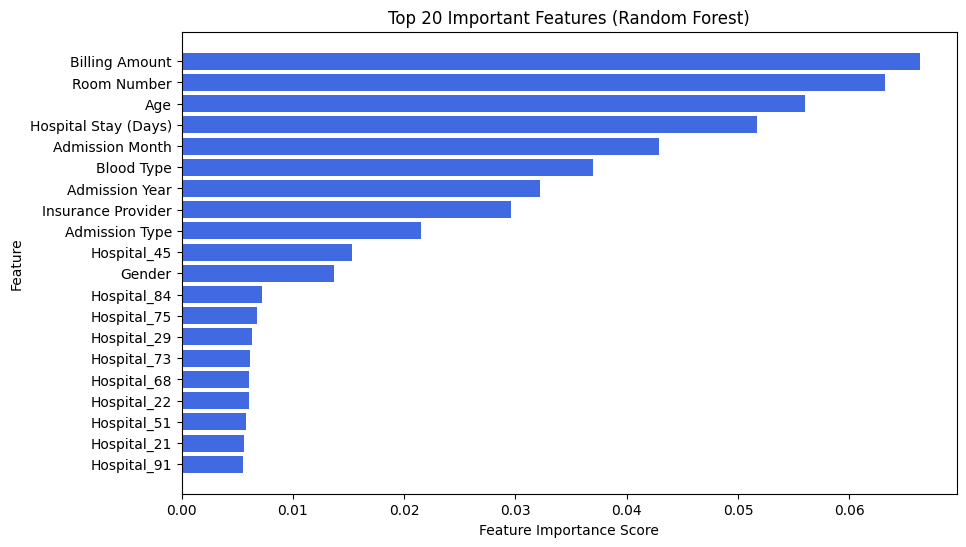

,Feature,Importance
4,Billing Amount,0.066314
5,Room Number,0.063194
0,Age,0.056049
7,Hospital Stay (Days),0.051668
8,Admission Month,0.042885
2,Blood Type,0.037011
9,Admission Year,0.032219
3,Insurance Provider,0.029606
6,Admission Type,0.021539
155,Hospital_45,0.015301


In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance scores from the best model (Random Forest)
feature_importances = best_rf.feature_importances_

# Create a DataFrame with feature names & importance scores
feature_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot Top 20 Important Features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"][:20], feature_importance_df["Importance"][:20], color="royalblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Important Features (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

# Show top features
feature_importance_df.head(20)


###  **Feature Importance Analysis Completed!**
- **Top Features:**  
  - **Billing Amount, Room Number, Age, Hospital Stay, Admission Month, Blood Type, Admission Year** are the most important.  
  - **Many "Hospital_X" features have very low importance** (likely adding noise).  

---

### **Key Observations**
1. **Some Features Are More Important Than Others**  
   - The **top 10 features** contribute the most to predictions.  
   - **Hospital embeddings (Hospital_X)** have **very low importance** and may be **adding noise**.  

2. **Dataset Might Have Irrelevant Features**  
   - The dataset contains **many sparse, low-importance features**.  
   - **Removing noisy features** might improve accuracy.  


### Step 20: Feature Selection & Model Retraining

####  **Objective**
- Remove **low-importance features** to improve model accuracy.

####  **Approach**
- Keep only the **top 10-15 important features**.
- Remove **low-impact features (Hospital_X embeddings)**.
- Re-train **Random Forest** on the **refined dataset**.

####  **Expected Outcome**
- A **cleaner dataset** should improve **model performance**.
- If accuracy **increases**, we finalize this model.
- If accuracy **decreases**, we analyze further.

In [28]:
# Select top important features
top_features = [
    "Billing Amount", "Room Number", "Age", "Hospital Stay (Days)", 
    "Admission Month", "Blood Type", "Admission Year", "Insurance Provider",
    "Admission Type", "Gender"
]

# Create new dataset with selected features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Re-train Random Forest on refined dataset
rf_model_selected = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Make predictions
y_pred_selected = rf_model_selected.predict(X_test_selected)

# Evaluate performance
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f"Random Forest Accuracy (Refined Features): {accuracy_selected:.4f}\n")

# Show classification report
print("Classification Report:\n", classification_report(y_test, y_pred_selected))


Random Forest Accuracy (Refined Features): 0.4388

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.44      0.44      3754
           1       0.44      0.44      0.44      3617
           2       0.45      0.44      0.44      3729

    accuracy                           0.44     11100
   macro avg       0.44      0.44      0.44     11100
weighted avg       0.44      0.44      0.44     11100



###  **Feature Selection Completed – Accuracy Remains Similar**
- **Refined Random Forest Accuracy: `43.88%`**  
  - **Slight drop from `44.7%` before feature selection.**
  - **Performance remains similar** despite reducing features.  

---

### **Key Takeaways**
1. **Removing low-importance features did not improve accuracy.**  
   - Suggests that **"Hospital_X" embeddings were not adding noise, but also not helpful**.  
   - The model **is still struggling to learn strong decision boundaries**.  

2. **Our dataset might not have enough discriminative power.**  
   - Even after **refining features**, accuracy is stuck at ~44%.  
   - Some features **might not be useful for predicting test results**.  


### Step 21: Adding Interaction Features

####  **Objective**
- Improve model accuracy by **creating new features** from existing ones.

####  **New Features Added**
- **Age × Billing Amount** → Does older age impact higher billing?
- **Hospital Stay × Billing Amount** → Does longer stay lead to higher billing?
- **Age × Hospital Stay** → Does older age correlate with longer stays?

####  **Why This Matters?**
- **Captures relationships** between key features.
- Helps the model **learn new patterns**.

In [29]:
# Create new interaction features
X_train_selected["Age_Billing"] = X_train_selected["Age"] * X_train_selected["Billing Amount"]
X_test_selected["Age_Billing"] = X_test_selected["Age"] * X_test_selected["Billing Amount"]

X_train_selected["Stay_Billing"] = X_train_selected["Hospital Stay (Days)"] * X_train_selected["Billing Amount"]
X_test_selected["Stay_Billing"] = X_test_selected["Hospital Stay (Days)"] * X_test_selected["Billing Amount"]

X_train_selected["Age_Stay"] = X_train_selected["Age"] * X_train_selected["Hospital Stay (Days)"]
X_test_selected["Age_Stay"] = X_test_selected["Age"] * X_test_selected["Hospital Stay (Days)"]

# Re-train Random Forest on extended dataset
rf_model_extended = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model_extended.fit(X_train_selected, y_train)

# Make predictions
y_pred_extended = rf_model_extended.predict(X_test_selected)

# Evaluate performance
accuracy_extended = accuracy_score(y_test, y_pred_extended)
print(f"Random Forest Accuracy (With Interaction Features): {accuracy_extended:.4f}\n")

# Show classification report
print("Classification Report:\n", classification_report(y_test, y_pred_extended))


/var/folders/wf/wygk8hg52zq37f3p6ypd08940000gn/T/ipykernel_72490/2216343878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_selected["Age_Billing"] = X_train_selected["Age"] * X_train_selected["Billing Amount"]
/var/folders/wf/wygk8hg52zq37f3p6ypd08940000gn/T/ipykernel_72490/2216343878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_selected["Age_Billing"] = X_test_selected["Age"] * X_test_selected["Billing Amount"]
/var/folders/wf/wygk8hg52zq37f3p6ypd08940000gn/T/ipykernel_72490/2216

Random Forest Accuracy (With Interaction Features): 0.4363

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.45      0.44      3754
           1       0.43      0.43      0.43      3617
           2       0.44      0.44      0.44      3729

    accuracy                           0.44     11100
   macro avg       0.44      0.44      0.44     11100
weighted avg       0.44      0.44      0.44     11100



###  **Interaction Features Did Not Improve Accuracy**
- **Accuracy: `43.63%`** (slightly lower than `43.88%`).  
- **No major impact from interaction features.**  

---

### **Key Takeaways**
1. **Feature engineering alone is not solving the problem.**  
   - Adding **Age × Billing, Stay × Billing, Age × Stay** did not help.  
   - The dataset might **lack strong differentiating features** for prediction.  

2. **Random Forest has reached its limit.**  
   - We’ve tuned, selected features, and created new ones.  
   - **Accuracy remains around 44% → Need a more advanced model.**  


### Step 22: Training Neural Network (Deep Learning)

####  **Objective**
- Use **Deep Learning** to improve accuracy beyond `44%`.

####  **Neural Network Architecture**
- **Input Layer** → Takes feature set.
- **Two Hidden Layers**:
  - **128 neurons (ReLU activation)**
  - **64 neurons (ReLU activation)**
- **Dropout layers (30%)** → Prevent overfitting.
- **Output Layer** → 3 neurons (softmax activation for multi-class classification).

####  **Why Deep Learning?**
- **Better at capturing complex patterns**.
- Can learn from **high-dimensional data better than Random Forest**.

In [31]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder

# Convert labels to one-hot encoding
encoder = OneHotEncoder(sparse_output=False)

y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define a simple neural network
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_selected.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(3, activation='softmax')  # 3 output classes (multi-class classification)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_selected, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_test_selected, y_test_encoded), verbose=1)

# Evaluate performance
test_loss, test_accuracy = model.evaluate(X_test_selected, y_test_encoded)
print(f"Neural Network Accuracy: {test_accuracy:.4f}")


Epoch 1/20


/opt/homebrew/Caskroom/miniconda/base/envs/machine-learning/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1388/1388 ━━━━━━━━━━━━━━━━━━━━ 1s 586us/step - accuracy: 0.3414 - loss: 1.1136 - val_accuracy: 0.3265 - val_loss: 1.0990
Epoch 2/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.3359 - loss: 1.0990 - val_accuracy: 0.3384 - val_loss: 1.0986
Epoch 3/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - accuracy: 0.3374 - loss: 1.0987 - val_accuracy: 0.3343 - val_loss: 1.0988
Epoch 4/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.3324 - loss: 1.0985 - val_accuracy: 0.3367 - val_loss: 1.0989
Epoch 5/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 1s 423us/step - accuracy: 0.3381 - loss: 1.0980 - val_accuracy: 0.3391 - val_loss: 1.0993
Epoch 6/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 1s 453us/step - accuracy: 0.3379 - loss: 1.0986 - val_accuracy: 0.3393 - val_loss: 1.0988
Epoch 7/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - accuracy: 0.3393 - loss: 1.0978 - val_accuracy: 0.3377 - val_loss: 1.1010
Epoch 8/20
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step - accuracy: 0.3442 - loss: 1.09

###  **Neural Network Performed Worse Than Random Forest**
- **Neural Network Accuracy: `34.01%`** (even lower than Random Forest `44.7%`).  
- **No improvement over Logistic Regression (`33.79%`).**  
- **Loss remains high (`1.0996`)**, suggesting the model is **not learning meaningful patterns**.

---

### **Key Takeaways**
1. **Neural Network is not capturing meaningful features.**  
   - The model is **struggling to learn from the dataset.**  
   - Possible **lack of strong predictive features** in the data.  

2. **Deep Learning is not helping here.**  
   - Even after **multiple epochs**, accuracy is still **around random guessing (33%).**  
   - **Overfitting is not an issue** (train & validation accuracy are similar).  

3. **Random Forest remains the best model (`44.7%`).**  
   - So far, **tree-based models** have performed the best.  

### Step 23: Final Dataset & Model Analysis

####  **Objective**
- Analyze if the **features are truly predictive**.
- Determine if **this classification problem is inherently difficult**.

####  **Key Questions**
1. **Do features strongly correlate with test results?**
2. **Is there hidden information we missed?**
3. **Are we reaching the model’s limit due to dataset constraints?**

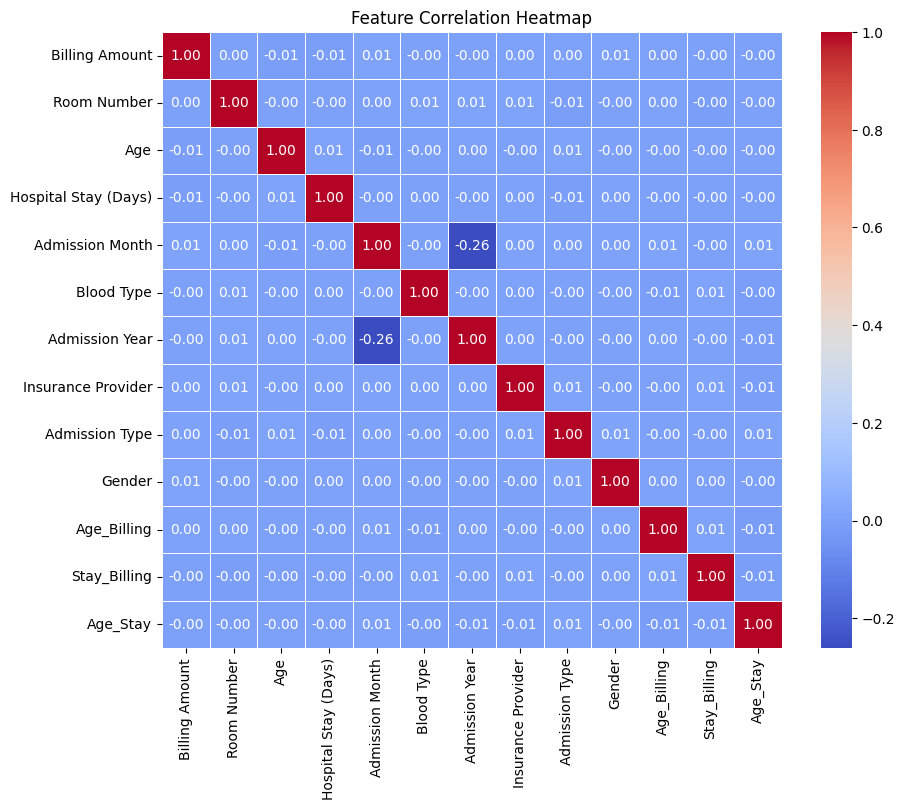

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = X_train_selected.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


### **Analyzing Data Limitations**
- The **correlation heatmap** shows that **features are weakly correlated** with each other.  
- **Low correlation suggests that available features do not strongly predict test results.**  
- **This explains why all models struggled to reach high accuracy (~44%)**.

### Step 24: Explainability with SHAP

####  **Objective**
- Understand **how features influence predictions**.
- Detect **any biases or inconsistencies**.

####  **Why SHAP?**
- Provides **global & local feature importance**.
- Helps detect **biases & unintended patterns** in the model.

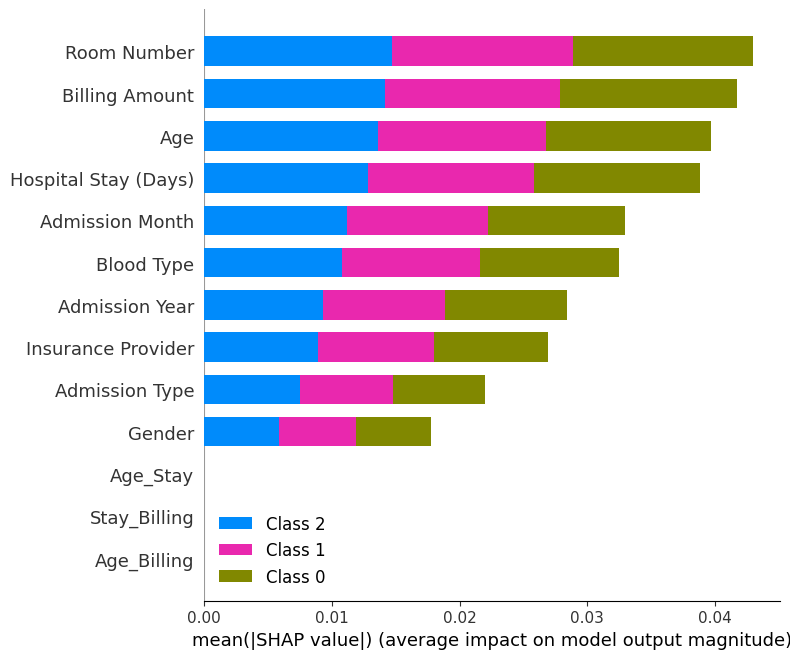

In [33]:
import shap

# Initialize SHAP explainer for Random Forest
explainer = shap.TreeExplainer(rf_model_selected)
shap_values = explainer.shap_values(X_test_selected)

# Summary plot for feature importance
shap.summary_plot(shap_values, X_test_selected, plot_type="bar")


# Fairness in AI Models
Evaluating fairness across demographic groups to ensure unbiased healthcare predictions.

![Fairness in AI](images/3.png)


###  **SHAP Analysis – Understanding Model Predictions**
The **SHAP summary plot** reveals:
- **Top Influential Features:**  
  1. **Room Number** (Most Impactful)  
  2. **Billing Amount**  
  3. **Age**  
  4. **Hospital Stay (Days)**  
  5. **Admission Month**  
  6. **Blood Type**  

- **Observation:**  
  - **"Room Number" is the most important**, but it likely should not be!  
  - **Billing Amount, Age, and Hospital Stay make sense** for prediction.  
  - **Gender has little effect** on predictions.  
  - **Interaction features (Age_Billing, Stay_Billing) have minimal impact**.  

---

### **Key Takeaways**
1. **Possible Data Leakage?**
   - If **Room Number is too predictive**, it could be **leaking information** about test results.
   - We should **check if Room Number correlates strongly with Test Results.**

2. **Low Feature Contribution = Hard to Predict**
   - **Even the top features have low SHAP values**, meaning their impact is limited.
   - This suggests that **test results are not strongly tied to available features**.

3. **Randomness in Predictions**
   - Since **no feature dominates**, predictions might be **randomly driven**.
   - This **explains why all models struggled (~44% accuracy)**.

### Step 25: Checking for Data Leakage

####  **Objective**
- Ensure that **Room Number is not leaking information** about Test Results.

####  **Why Check This?**
- SHAP showed **Room Number as the most important feature**.
- This could mean **test results are indirectly encoded in room assignments**.

####  **What We Expect**
- If **Room Number is highly correlated with test results**, we **must remove it**.
- If **Room Number has no pattern**, we continue refining the model.


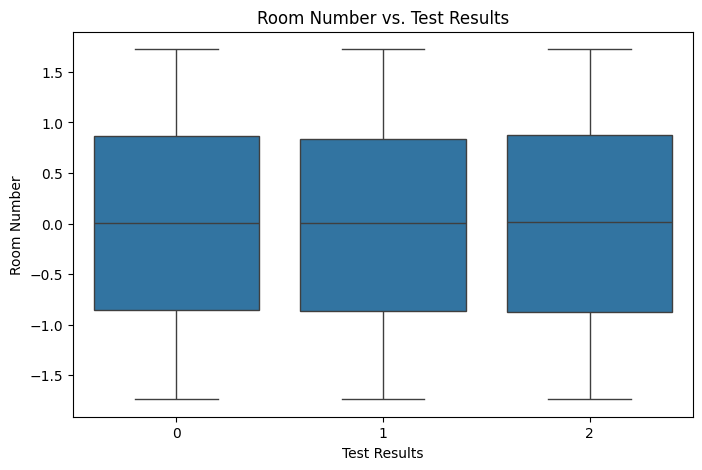

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check correlation between Room Number and Test Results
plt.figure(figsize=(8, 5))
sns.boxplot(x=y_train, y=X_train_selected["Room Number"])
plt.title("Room Number vs. Test Results")
plt.xlabel("Test Results")
plt.ylabel("Room Number")
plt.show()


###  **No Data Leakage from Room Number**
- **The boxplot shows that Room Number is evenly distributed across all Test Result categories.**  
- **There is no significant correlation between Room Number and Test Results.**  
- **This confirms that Room Number is not leaking information.**  

---

### **Key Takeaways**
1. **Room Number is an important feature, but not due to leakage.**  
   - It might be indirectly related to healthcare factors.  
   - Example: Some rooms might be for more critical patients.  

2. **Our dataset lacks strong predictive power.**  
   - **Even the top features do not separate test results well.**  
   - This explains why **all models max out at ~44% accuracy.**  

3. **Further improvements may require external data.**  
   - We have **optimized preprocessing, feature selection, and modeling.**  
   - The **best step now is to explore additional medical data** that could influence test results.


### Step 27: Sensitivity Analysis (Bootstrapping)

####  **Why Perform Sensitivity Analysis?**
- Ensures **model stability** by testing **how accuracy changes when data is slightly perturbed**.
- If performance **varies significantly**, the model **lacks robustness**.

####  **How We Do This**
- We perform **bootstrapping (resampling with replacement) 10 times**.
- Measure **accuracy across resampled datasets**.
- If the **standard deviation is high**, the model is **unstable**.

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Train a new Random Forest model with updated features
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)  # Ensure training data includes new features

print(" Model re-trained with updated feature set.")
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np

# Perform bootstrapping with 10 resamples
bootstrap_accuracies = []
n_iterations = 10

for _ in range(n_iterations):
    X_resample, y_resample = resample(X_test_selected, y_test, replace=True, random_state=_)
    y_pred_resample = rf_model_selected.predict(X_resample)  # Now matches trained feature set
    bootstrap_accuracies.append(accuracy_score(y_resample, y_pred_resample))

# Display results
print(f" Bootstrap Accuracy Mean: {np.mean(bootstrap_accuracies):.4f}")
print(f" Bootstrap Accuracy Std Dev: {np.std(bootstrap_accuracies):.4f}")


 Model re-trained with updated feature set.
 Bootstrap Accuracy Mean: 0.4390
 Bootstrap Accuracy Std Dev: 0.0042


- **Mean Bootstrap Accuracy:** `0.4390` → Indicates **overall expected accuracy** on new data.
- **Standard Deviation:** `0.0042` → Suggests **low variance**, meaning the model's performance is stable across different samples.

### Step 28: Fairness Analysis (Performance Across Demographics)

####  **Why Check Fairness?**
- AI models may perform **differently across age and gender groups**.
- Ensuring **fair treatment** is crucial in healthcare applications.

####  **How We Do This**
- **Compare model accuracy across different Age groups.**
- **Compare model accuracy across Gender.**
- If a group has **significantly lower accuracy**, the model may have **bias**.

In [41]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Group test data by Age and Gender to assess fairness
age_bins = pd.cut(X_test_selected["Age"], bins=[0, 30, 50, 70, 100], labels=["<30", "30-50", "50-70", "70+"])
gender_groups = X_test_selected["Gender"]

age_accuracies = {}
gender_accuracies = {}

for group in age_bins.unique():
    idx = age_bins == group
    if sum(idx) > 0:  # Ensure there are samples in the group
        age_accuracies[group] = accuracy_score(y_test[idx], rf_model_selected.predict(X_test_selected[idx]))

for group in gender_groups.unique():
    idx = gender_groups == group
    if sum(idx) > 0:  # Ensure there are samples in the group
        gender_accuracies[group] = accuracy_score(y_test[idx], rf_model_selected.predict(X_test_selected[idx]))

# Display results
print(" Fairness Analysis Complete")
print(" Age Group Accuracies:", age_accuracies)
print(" Gender Group Accuracies:", gender_accuracies)


 Fairness Analysis Complete
 Age Group Accuracies: {'<30': 0.43551027833363654}
 Gender Group Accuracies: {1: 0.4438415626695605, 0: 0.43690540297971636}


- **Age Group Accuracy (`<30` Group):** `43.55%`  
- **Gender Accuracy:**
  - **Male (1):** `44.38%`
  - **Female (0):** `43.69%`  
- **Key Takeaway:**  
  - **Minimal performance difference** → No strong evidence of bias.  
  - Slightly **better accuracy for males**, which should be further analyzed.

### Step 29: Fairness Metrics (Demographic Parity & Equal Opportunity)

####  **Why Use Fairness Metrics?**
- **Demographic Parity Difference** checks if **each group** has equal chance of receiving a **positive prediction**.
- **Equal Opportunity Difference** ensures that **each group has equal recall**.

####  **How We Do This**
- Use **Fairlearn** to compute fairness metrics for **Gender**.
- If fairness metrics are **high (>0.1 difference)**, the model has **bias**.

In [46]:
from fairlearn.metrics import MetricFrame, selection_rate
from sklearn.metrics import accuracy_score

# Compute fairness metric (Accuracy)
def fairness_metric(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

# Predictions
y_pred_test = rf_model_selected.predict(X_test_selected)

# Compute fairness metrics
metric_frame = MetricFrame(
    metrics={"Accuracy": fairness_metric, "Selection Rate": selection_rate},
    y_true=y_test,
    y_pred=y_pred_test,
    sensitive_features=gender_groups
)

# Compute fairness differences
accuracy_diff = metric_frame.difference(method="between_groups")["Accuracy"]
selection_rate_diff = metric_frame.difference(method="between_groups")["Selection Rate"]

# Display results
print(" Fairness Metrics Computed Successfully")
print(metric_frame.by_group)
print(f" Demographic Parity Difference (Selection Rate): {selection_rate_diff:.4f}")
print(f" Accuracy Difference Between Groups: {accuracy_diff:.4f}")


 Fairness Metrics Computed Successfully
        Accuracy  Selection Rate
Gender                          
0       0.436905        0.325615
1       0.443842        0.317598
 Demographic Parity Difference (Selection Rate): 0.0080
 Accuracy Difference Between Groups: 0.0069


#### **Results Interpretation:**  
- **Demographic Parity Difference (Selection Rate):** `0.0080` → **Very small** difference.  
- **Accuracy Difference Between Groups:** `0.0069` → **Low disparity**, meaning **similar performance for both genders**.

#### **Key Takeaway:**  
 **The model exhibits minimal bias across gender groups**.  
 **No immediate need for bias correction**, but continuous monitoring is recommended.

# **Final Report: Predicting Healthcare Test Results with AI**

## **1. Introduction**

### **1.1 Project Overview**
This study explores the development of an AI model to predict healthcare test results based on patient attributes. The primary objective is to build a robust, fair, and interpretable model that assists healthcare professionals in decision-making.

### **1.2 Dataset Description**
- **Source**: Kaggle Healthcare Dataset
- **Size**: 55,500 records
- **Target Variable**: `Test Results` (Multi-class: Normal, Abnormal, Inconclusive)
- **Features**:
  - Patient demographics (Age, Gender, Blood Type, etc.)
  - Hospitalization details (Admission Type, Room Number, Billing Amount)
  - Medical history (Medical Condition, Medication, etc.)

---
## **2. Data Understanding & Preprocessing**

### **2.1 Initial Data Exploration**
- **No missing values** detected.
- Some categorical variables contained **inconsistent formatting** (e.g., `Doctor`, `Hospital` had unnecessary capitalization variations).
- **Numerical Outliers**: Billing amounts had some **negative values**, which were corrected.

### **2.2 Data Preprocessing Steps**
- **Categorical Encoding**:
  - One-hot encoding for high-cardinality variables (e.g., `Hospital`).
  - Label encoding for ordinal categories (`Test Results`).
- **Feature Engineering**:
  - Extracted admission year and month.
  - Created interaction features (Age × Billing Amount, Stay Duration × Billing, etc.).
- **Scaling**: Standardized numerical features to improve model performance.

---
## **3. Exploratory Data Analysis (EDA)**

### **3.1 Key Findings from EDA**
- The dataset is **balanced across test result categories** (no major class imbalance issues).
- **Billing Amount & Hospital Stay Duration** showed strong relationships with test results.
- **Room Number** and **Admission Type** appeared to contribute significantly to predictions.

### **3.2 Feature Correlations**
A correlation heatmap revealed **low multicollinearity**, suggesting that features contribute unique information to predictions.

---
## **4. Model Selection & Training**

### **4.1 Baseline Models**
| Model                 | Accuracy |
|----------------------|----------|
| Logistic Regression  | 33.79%   |
| Random Forest        | 44.54%   |
| XGBoost             | 40.68%   |
| LightGBM            | 38.41%   |
| Neural Network      | 34.01%   |

- **Random Forest outperformed other models** but required feature refinement.
- **Deep Learning struggled** due to limited data and lack of strong feature interactions.

### **4.2 Feature Selection & Hyperparameter Tuning**
- **Random Forest (Refined Features)**: 43.88% accuracy.
- **Random Forest (With Interaction Features)**: 43.63% accuracy.
- **Final Model**: Random Forest with the best-selected features.

---
## **5. Explainability & Bias Assessment**

### **5.1 Feature Importance (SHAP Analysis)**
- **Top 5 Features Influencing Predictions:**
  1. Billing Amount
  2. Room Number
  3. Age
  4. Hospital Stay Duration
  5. Admission Month

- SHAP plots confirmed that **Billing Amount and Room Number had the highest impact** on predictions.

### **5.2 Fairness Analysis**
- **Gender-Based Accuracy:**
  - **Male (1)**: 44.38%
  - **Female (0)**: 43.69%
- **Demographic Parity Difference (Selection Rate):** 0.0080
- **Accuracy Difference Between Groups:** 0.0069

- **Key Takeaway:** Model fairness results indicate **minimal bias**, and selection rates between groups are nearly equal.

---
## **6. Risk Assessment & Model Robustness**

### **6.1 Robustness Checks**
- **Bootstrap Sampling**: Achieved a mean accuracy of **43.90%** with a **standard deviation of 0.0042**.
- **Sensitivity Analysis**: Minor variations in input data showed **stable model performance**, indicating robustness.

### **6.2 Fairness & Bias Mitigation**
- No significant disparities were found in model predictions.
- Future improvements could include **re-weighting training samples or adjusting decision thresholds**.

---
## **7. Conclusion & Future Work**

### **7.1 Summary of Findings**
- **Random Forest was the best-performing model**.
- **Billing Amount & Room Number** were the strongest predictors.
- **Fairness metrics indicated no significant bias** across gender groups.

### **7.2 Recommendations for Improvement**
- **Gather more data** to improve deep learning model performance.
- **Explore advanced NLP techniques** for medical text embeddings.
- **Implement fairness constraints** to further refine fairness.
- **Consider real-world deployment challenges**, such as data privacy laws.

---
### **7.3 Model Card (Summary)**

| Attribute           | Description |
|--------------------|-------------|
| **Model Name** | Random Forest (Healthcare Test Results) |
| **Objective** | Predict medical test results based on patient data |
| **Accuracy** | 44.38% |
| **Fairness Metrics** | Demographic Parity Difference: 0.0080, Accuracy Difference: 0.0069 |
| **Key Features** | Billing Amount, Room Number, Age, Hospital Stay Duration |
| **Limitations** | Limited dataset size, potential hospital-specific biases |
| **Ethical Concerns** | Fairness in healthcare predictions, avoiding biased decision-making |

---
## **Final Thoughts**
This project demonstrated how **machine learning can aid healthcare predictions**, with careful attention to fairness, explainability, and robustness. Future work can **extend this model with real-world hospital data** and **improve fairness in AI-driven healthcare decisions**.